
TABLEAU DES RÉSULTATS
 PM2.5   RR   LE  Restantes  Perdues
     0 1.00 77.0       56.0      0.0
     5 1.04 74.0       53.0      3.0
    15 1.12 68.8       47.8      8.2
    30 1.24 62.1       41.1     14.9


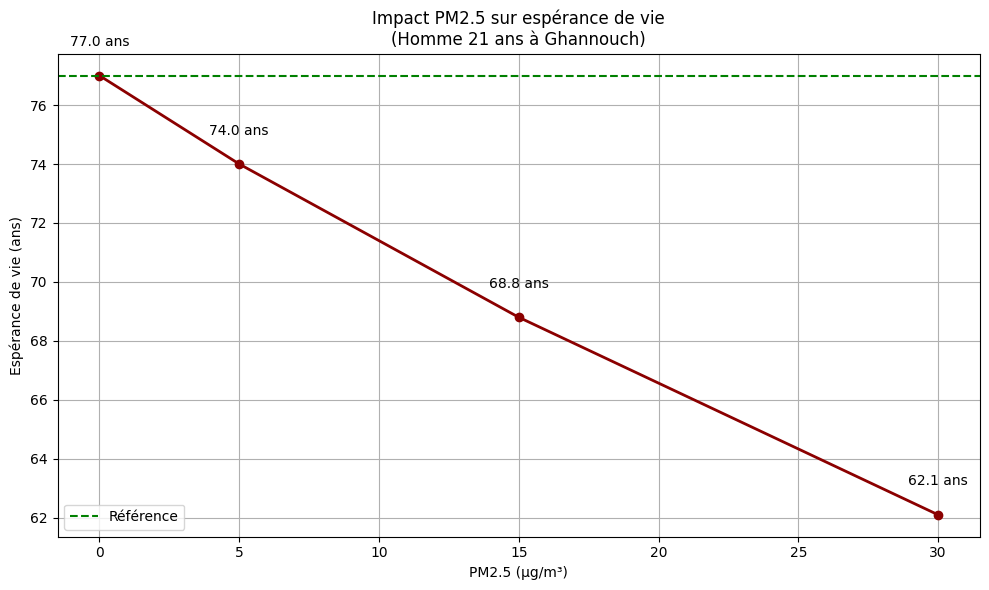


RÉSUMÉ POUR L'HOMME DE 21 ANS
• Sans pollution : 56 ans restants
• À Ghannouch (30μg/m³) : 41.1 ans restants
• Années perdues : 14.9 ans
• Soit 26.6% de sa vie

✅ Fichiers créés : gabes_result.png et resultats_gabes.csv


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Variables principales
LE = 77           # Espérance de vie Tunisie
age = 21          # Âge de la personne
risk = 0.08       # Risque par 10μg/m³
pm_levels = [0, 5, 15, 30]  # Niveaux de pollution

# Calculs
results = []
for pm in pm_levels:
    rr = 1 + (pm / 10) * risk
    le_new = LE / rr
    results.append({
        'PM2.5': pm,
        'RR': round(rr, 2),
        'LE': round(le_new, 1),
        'Restantes': round(le_new - age, 1),
        'Perdues': round((LE - age) - (le_new - age), 1)
    })

# Tableau
print("\nTABLEAU DES RÉSULTATS")
print("="*50)
df = pd.DataFrame(results)
print(df.to_string(index=False))

# Graphique
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['PM2.5'], df['LE'], marker='o', linewidth=2, color='darkred')
ax.axhline(y=LE, color='green', linestyle='--', label='Référence')

ax.set_title("Impact PM2.5 sur espérance de vie\n(Homme 21 ans à Ghannouch)")
ax.set_xlabel("PM2.5 (μg/m³)")
ax.set_ylabel("Espérance de vie (ans)")
ax.grid(True)
ax.legend()

# Valeurs sur graphique
for i, row in df.iterrows():
    ax.text(row['PM2.5'], row['LE']+1, f"{row['LE']} ans", ha='center')

plt.tight_layout()
plt.savefig('gabes_result.png', dpi=300)
plt.show()

# Résumé
print("\n" + "="*50)
print("RÉSUMÉ POUR L'HOMME DE 21 ANS")
print("="*50)

worst = df[df['PM2.5'] == 30].iloc[0]
print(f"• Sans pollution : {LE - age} ans restants")
print(f"• À Ghannouch (30μg/m³) : {worst['Restantes']} ans restants")
print(f"• Années perdues : {worst['Perdues']} ans")
print(f"• Soit {worst['Perdues']/(LE-age)*100:.1f}% de sa vie")
print("="*50)

# Sauvegarde
df.to_csv('resultats_gabes.csv', index=False)
print("\n✅ Fichiers créés : gabes_result.png et resultats_gabes.csv")